<a href="https://colab.research.google.com/github/Akshaymahajan2111/Python/blob/main/Linear_Regression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
wcat=pd.read_csv('wc-at.csv')
wcat
wcat.columns

Index(['Waist', 'AT'], dtype='object')

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


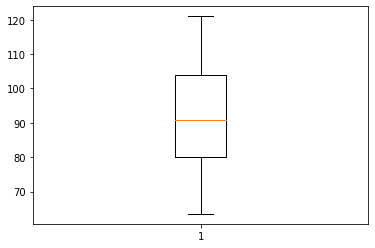

In [4]:
plt.boxplot(wcat.Waist)
wcat.describe()

In [5]:
wcat

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


(array([ 2.,  9., 19., 17., 11.,  9., 13., 21.,  5.,  3.]),
 array([ 63.5 ,  69.25,  75.  ,  80.75,  86.5 ,  92.25,  98.  , 103.75,
        109.5 , 115.25, 121.  ]),
 <a list of 10 Patch objects>)

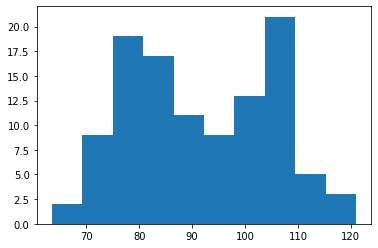

In [6]:
plt.hist(wcat.Waist)

{'boxes': [<matplotlib.lines.Line2D at 0x7ff2ef212128>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff2ef212b38>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff2ef2195f8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff2ef219278>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff2ef212438>,
  <matplotlib.lines.Line2D at 0x7ff2ef2127b8>]}

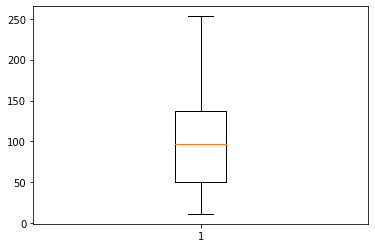

In [7]:
plt.boxplot(wcat.AT)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

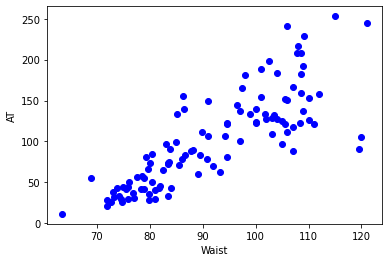

In [11]:
plt.plot(wcat.Waist,wcat.AT, "bo")
plt.xlabel("Waist")
plt.ylabel("AT")
help(plt.plot)

In [12]:
wcat.AT.corr(wcat.Waist)

0.818557812895853

In [14]:
import statsmodels.formula.api as smf
model=smf.ols("AT~Waist", data=wcat).fit()
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Tue, 12 Jan 2021   Prob (F-statistic):           1.62e-27
Time:                        03:25:16   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
model.resid
model.resid_pearson

array([-5.09550501e-01, -2.79501693e-01, -7.36526900e-01, -9.55385603e-01,
       -3.74486373e-01, -3.28370857e-01, -1.05127206e+00, -1.19484256e+00,
        2.35413067e-01, -1.50825045e-01, -1.32784262e-01,  1.29149997e-02,
        4.07944734e-02, -4.47253451e-01, -5.86442653e-01,  1.01675760e+00,
       -8.88821743e-02, -2.14212943e-01,  1.23020519e-01, -5.21275561e-01,
       -4.00177964e-01, -7.13451894e-01, -7.54617582e-01, -9.81667583e-01,
       -6.59459501e-01, -9.62759522e-01, -3.19781076e-03,  6.60618576e-01,
       -7.83434219e-02, -1.39858512e-01, -8.26468630e-03,  1.71170943e-02,
       -5.78950111e-01, -2.93076130e-01, -2.97057035e-01,  3.06042549e-01,
        2.48761552e-01, -3.41178084e-01,  4.02019198e-01, -5.40876395e-02,
        8.97412236e-03,  1.09123902e-01, -3.50119995e-01,  1.71753428e+00,
        7.69279067e-01, -1.10275004e+00, -9.64451677e-02,  3.66529597e-01,
        1.88429083e-01,  6.95115285e-01,  4.95265365e-01,  5.09877715e-01,
        1.64182014e+00, -

In [20]:
#print(model.conf_inf(0.05)

In [22]:
pred = model.predict(wcat.iloc[:,0])
pred
pd.set_option("display.max_rows", None)
pred
rmse_lin = np.sqrt(np.mean((np.array(wcat['AT'])-np.array(pred))**2))
rmse_lin

32.760177495755144

AttributeError: ignored

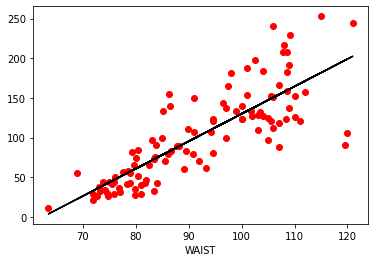

In [24]:
import matplotlib.pylab as plt
plt.scatter(x=wcat['Waist'],y=wcat['AT'],color='red')
plt.plot(wcat['Waist'],pred, color='black')
plt.xlabel('WAIST')
plt.ylable('TISSUE')

In [27]:
model2 = smf.ols('AT~np.log(Waist)',data =wcat).fit()
model2.params
model2.resid
model2.resid_pearson

array([-0.43013734, -0.14277119, -0.78693898, -1.03169533, -0.29158069,
       -0.17072207, -1.09217203, -1.26753789,  0.71159098, -0.02935936,
        0.0249957 ,  0.09064127,  0.16648517, -0.453832  , -0.55712337,
        1.28132469, -0.03350272, -0.1177564 ,  0.23104721, -0.4683047 ,
       -0.3663138 , -0.75161482, -0.77830685, -1.09106674, -0.7117678 ,
       -1.07557488, -0.09283294,  0.63933201, -0.16463682, -0.19400747,
       -0.07238728, -0.0802131 , -0.68825537, -0.39746025, -0.34761146,
        0.20790802,  0.14597966, -0.38096686,  0.38615285, -0.05748072,
       -0.05500881,  0.16501712, -0.37959565,  1.64246669,  0.71680066,
       -1.09376091, -0.19844663,  0.26888514,  0.17552244,  0.6927808 ,
        0.39628543,  0.44691315,  1.57546435, -0.03336243, -0.40359241,
        0.07330998, -0.06125654,  2.12217705, -0.35582472, -0.01868772,
        0.16327227,  0.59521585, -0.99394743, -1.04905189, -3.00230059,
       -2.55120694,  0.7066452 , -0.85675711, -1.53858542,  0.37

In [29]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     222.6
Date:                Tue, 12 Jan 2021   Prob (F-statistic):           6.80e-28
Time:                        03:38:12   Log-Likelihood:                -534.11
No. Observations:                 109   AIC:                             1072.
Df Residuals:                     107   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1328.3420     95.923    -13.848      0.000   -1518.498   -1138.186
np.log(Waist)   317.1356     21.258     14.918      0.000     274.994     359.277
==============================================================================
Omnibus:                        3.317   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.908
Skew:                           0.235   Prob(JB):                        0.234
Kurtosis:                       3.647   Cond. No.                         145.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
pred2 = model2.predict(pd.DataFrame(wcat['Waist']))

In [33]:
pred2
rmse_log = np.sqrt(np.mean((np.array(wcat['AT'])-np.array(pred2))**2))
rmse_log

32.496884909321274

In [34]:
pred2.corr(wcat.AT)

0.8217781862645354

Text(0, 0.5, 'TISSUE')

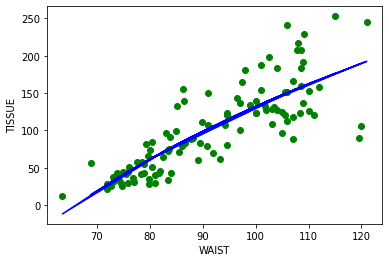

In [36]:
plt.scatter(x=wcat['Waist'],y=wcat['AT'],color='green')
plt.plot(wcat['Waist'],pred2, color='blue')
plt.xlabel('WAIST')
plt.ylabel('TISSUE')